In [2]:
import numpy as np
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import metrics
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

### Data load of Iris data set

In [4]:
PATH='Data/'
df_Iris_DS=pd.read_csv(f'{PATH}Iris.csv')

In [5]:
df_Iris_DS.shape

(150, 5)

In [8]:
df_Iris_DS.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df_Iris_DS.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [10]:
#check for null values
df_Iris_DS.isnull().any()

Sepal.Length    False
Sepal.Width     False
Petal.Length    False
Petal.Width     False
Species         False
dtype: bool

In [44]:
#Iris_input_Columns=['Sepal.Length','Sepal.Width','Petal.Width']
Iris_input_Columns=['Petal.Length','Sepal.Width','Petal.Width']
Iris_features_selected_DS=df_Iris_DS[Iris_input_Columns]
#Based on the EDA , Box plots of Iris data set, we saw that Sepal width and sepal length have low impact
# Let us try to provde that

In [12]:
#Iris_input_Columns=['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']

In [45]:
y=target=output=df_Iris_DS['Species']

In [46]:
# We have get the training and test dataset
#30% for test 70% for training

x_train,x_test,Y_train,Y_test=train_test_split(Iris_features_selected_DS,y,test_size=0.30)

In [47]:
print('train-',x_train.shape,'test',x_test.shape)

train- (105, 3) test (45, 3)


In [48]:
print ('Total records in Iris dataset',df_Iris_DS.shape[0])
print ('Train dataset hass ',x_train.shape[0],'records which is 70%',0.7*df_Iris_DS.shape[0])
print ('Test dataset hass ',x_test.shape[0],'records which is 30%',0.3*df_Iris_DS.shape[0])

Total records in Iris dataset 150
Train dataset hass  105 records which is 70% 105.0
Test dataset hass  45 records which is 30% 45.0


### Decision Tree

In [49]:
Iris_Decision_tree=tree.DecisionTreeClassifier(criterion='entropy',
                                               max_features=None,max_depth=None,random_state=12)

In [50]:
fitIrisDS=Iris_Decision_tree.fit(x_train,Y_train)

In [155]:
#This is with 'Sepal.Length','Sepal.Width','Petal.Width'
#Iris_Decision_tree.feature_importances_
#array([0.07127027, 0.0464954 , 0.88223433])

array([0.07127027, 0.0464954 , 0.88223433])

In [51]:
#This is with 'Sepal.Length','Sepal.Width','Petal.Width'
Iris_Decision_tree.feature_importances_

array([0.65282362, 0.02857143, 0.31860495])

In [52]:
#This is with 'Sepal.Length','Sepal.Width','Petal.Width'
'''[('Sepal.Length', 0.07127026756281572),
 ('Sepal.Width', 0.04649539936873955),
 ('Petal.Width', 0.8822343330684447)]'''

"[('Sepal.Length', 0.07127026756281572),\n ('Sepal.Width', 0.04649539936873955),\n ('Petal.Width', 0.8822343330684447)]"

In [53]:
list(zip(Iris_input_Columns,Iris_Decision_tree.feature_importances_))

[('Petal.Length', 0.6528236215465077),
 ('Sepal.Width', 0.028571428571428574),
 ('Petal.Width', 0.3186049498820636)]

In [54]:
with open('Iris_Decision_tree.dot','w') as f:
    f=tree.export_graphviz(fitIrisDS,out_file=f,feature_names=Iris_input_Columns)
    print (f)

None


In [55]:
x_test.head()

,Petal.Length,Sepal.Width,Petal.Width
23,1.7,3.3,0.5
90,4.4,2.6,1.2
137,5.5,3.1,1.8
59,3.9,2.7,1.4
32,1.5,4.1,0.1


In [56]:
prediction=fitIrisDS.predict(x_test)
prediction.shape

(45,)

In [57]:
Y_train.shape

(105,)

In [ ]:
##This is with 'Sepal.Length','Sepal.Width','Petal.Width'
'''array([[21,  0,  0],
       [ 0,  9,  1],
       [ 0,  1, 13]])'''

In [58]:
Iris_confusion_matrix=metrics.confusion_matrix(Y_test,prediction)
Iris_confusion_matrix

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

In [59]:
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    plt.title('Confusion Matrix')
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

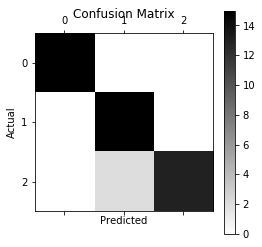

In [60]:
plot_confusion_matrix(Iris_confusion_matrix)

In [61]:
##This is with 'Sepal.Length','Sepal.Width','Petal.Width'
#accuracy_score
#0.9555555555555556

In [63]:
print(metrics.accuracy_score(Y_test,prediction))

0.9555555555555556


In [ ]:
###This is with 'Sepal.Length','Sepal.Width','Petal.Width'
'''       precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        21
 versicolor       0.90      0.90      0.90        10
  virginica       0.93      0.93      0.93        14

avg / total       0.96      0.96      0.96        45'''

In [64]:
print(metrics.classification_report(Y_test,prediction))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.88      1.00      0.94        15
  virginica       1.00      0.87      0.93        15

avg / total       0.96      0.96      0.96        45



### Using GridSearchCV

In [65]:
###This is with 'Sepal.Length','Sepal.Width','Petal.Width'
#0.9238095238095239

In [68]:
iris_hyper_para={"criterion":['gini','entropy'],"max_depth":[3,7],"max_leaf_nodes":[20,30]}
iris_grid_classifier=GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=iris_hyper_para)
iris_grid_model=iris_grid_classifier.fit(x_train,Y_train)
print(iris_grid_model.best_params_)
print(iris_grid_model.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 20}
0.9333333333333333


In [69]:
iris_grid_prediction=iris_grid_model.predict(x_test)

In [70]:
metrics.accuracy_score(Y_test,iris_grid_prediction)

0.9555555555555556

In [71]:
print(metrics.classification_report(Y_test,iris_grid_prediction))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.88      1.00      0.94        15
  virginica       1.00      0.87      0.93        15

avg / total       0.96      0.96      0.96        45



In [72]:
Iris_GridSearch_CF=metrics.confusion_matrix(Y_test,iris_grid_prediction)
print(Iris_GridSearch_CF)

[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]


### Random forest

In [73]:
Iris_RF=RandomForestClassifier(criterion='entropy',random_state=112)

In [74]:
Iris_RFModel=Iris_RF.fit(x_train,Y_train)

In [75]:
Iris_RFModel.feature_importances_

array([0.28340369, 0.12318377, 0.59341254])

In [76]:
list(zip(Iris_input_Columns,Iris_RFModel.feature_importances_))

[('Petal.Length', 0.2834036929462044),
 ('Sepal.Width', 0.1231837674170444),
 ('Petal.Width', 0.5934125396367513)]

In [77]:
RF_prediction=Iris_RFModel.predict(x_test)

In [78]:
RF_prediction.shape

(45,)

In [79]:
RF_confusion_matrix=metrics.confusion_matrix(Y_test,RF_prediction)
RF_confusion_matrix

array([[15,  0,  0],
       [ 0, 15,  0],
       [ 0,  2, 13]])

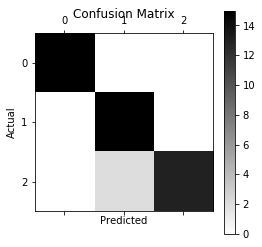

In [80]:
plot_confusion_matrix(RF_confusion_matrix)

In [81]:
metrics.accuracy_score(Y_test,RF_prediction)

0.9555555555555556

In [82]:
print(metrics.classification_report(Y_test,RF_prediction))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        15
 versicolor       0.88      1.00      0.94        15
  virginica       1.00      0.87      0.93        15

avg / total       0.96      0.96      0.96        45

